## Unsupervised learning for red wine characteristics

First, import the red wine csv file into a pandas dataframe from the following website:

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

In [10]:
redwine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=";")
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

In [11]:
# Prepare data

X = pd.DataFrame(scale(redwine), index=redwine.index, columns=redwine.columns)

Text(0.5, 1.0, 'Elbow curve')

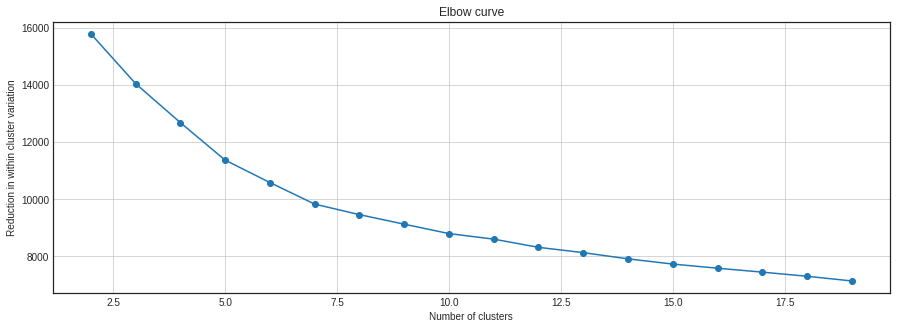

In [12]:
# Choose the number of clusters

within_cluster_variance = [] # initiate empty list with no data

# build models for range of ks from 2 to 20
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')

plt.title('Elbow curve')  #Choose k at elbow of plot as a general rule.  We want a small enough number of categories to 
                          # such that we can still learn something meaningful from them via exploration of our variables.

#### From the elbow curve, I choose cluster = 7. 

In [13]:
km1 = KMeans(n_clusters=7, n_init=20)
km1.fit(X)

KMeans(n_clusters=7, n_init=20)

In [14]:
km1.predict(X)

array([1, 1, 1, ..., 3, 3, 6], dtype=int32)

In [17]:
# Add new labels to original data and explore what clusters mean by evaluating column means.

X['cluster'] = km1.labels_

# means for full scaled data
display(X.groupby('cluster').mean()) #cluster means

X.groupby('cluster').groups

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,1.649840,-0.574072,1.239628,0.116616,0.065484,-0.499587,-0.446346,1.141878,-0.982190,0.243698,-0.054849,0.131350
1,-0.419413,0.650332,-0.771645,-0.210421,-0.037210,-0.488711,-0.402476,0.023444,0.324682,-0.411105,-0.531644,-0.517988
2,-0.122608,0.025354,0.057921,-0.022058,-0.039873,0.996220,1.228121,0.205587,-0.098346,-0.173120,-0.571036,-0.420264
3,-1.069192,0.393963,-0.927590,-0.242081,-0.407912,0.237245,-0.192878,-1.300774,1.142859,-0.141432,1.147104,0.474669
4,-0.085633,-0.034652,0.414856,4.961768,0.296388,1.750191,1.695832,1.225001,-0.325460,-0.023789,-0.363913,-0.022761
5,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695
6,0.197069,-1.006324,0.722488,-0.106209,-0.283650,-0.315490,-0.539697,-0.563478,-0.208398,0.456852,1.019001,1.053315


{0: [3, 47, 56, 75, 76, 113, 115, 197, 205, 206, 209, 212, 241, 243, 244, 250, 252, 256, 259, 264, 265, 269, 271, 272, 277, 280, 286, 289, 292, 294, 295, 301, 305, 307, 308, 310, 326, 327, 328, 329, 330, 331, 335, 338, 339, 340, 341, 342, 343, 344, 347, 348, 350, 353, 356, 358, 359, 362, 363, 364, 366, 367, 368, 374, 375, 376, 378, 381, 389, 391, 392, 394, 395, 397, 398, 402, 403, 406, 407, 408, 409, 413, 416, 418, 429, 432, 433, 434, 435, 437, 438, 440, 441, 442, 446, 447, 449, 450, 453, 458, ...], 1: [0, 1, 2, 4, 5, 6, 8, 10, 18, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 36, 38, 41, 43, 44, 48, 50, 51, 52, 55, 58, 59, 62, 63, 64, 65, 66, 67, 69, 70, 73, 77, 78, 80, 85, 87, 89, 93, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 110, 114, 116, 117, 118, 120, 121, 122, 123, 126, 127, 129, 133, 134, 135, 136, 137, 140, 141, 143, 148, 158, 160, 161, 162, 167, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 187, ...], 2: [9, 11, 14, 15, 16, 20, 21, 32, 39, 40, 46

### Describe variables that cluster with higher values of wine quality. 

The cluster 6 has the highest value of wine quality which is 1.053315. The fixed acidity of cluster with higher quality value is 0.197069. The volatile acidity is -1.006324. The citric acid is 0.7224788. The residual sugar is -0.106209. The chlorides is -0.283650. The free sulfur dioxide is -0.31549. The total sulfur dioxide is -0.539697. The density is -0.563478. The pH is -0.208398. The sulphates is 0.456852. The alcohol is 1.019. 

### Describe variables that cluster with lower values of wine quality.

The cluster 1 has the lowest value of wine quality which is -0.517988. The fixed acidity of cluster with lower quality value is -0.419413. The volatile acidity is 0.650332. The citric acid is -0.771645. The residual sugar is -0.210421. The chlorides is -0.037210. The free sulfur dioxide is -0.488711. The total sulfur dioxide is -0.402476. The density is 0.023444. The pH is 0.324682. The sulphates is -0.411105. The alcohol is -0.531644. 

### If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

By comparing the results of two clusters, I find that these variables are the most important which contribute to higher quality values, which are fixed acidity, citric acid, residual sugar, free sulfur dioxide, sulphates and alcohol. 

### 2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.


In [18]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=7,   # note that we select the clusters
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)    # extract cluster labels for each observation in data
print(labels)

[0 0 0 ... 2 2 6]


In [19]:
X['cluster'] = ac.labels_

In [20]:
# means for full scaled data
display(X.groupby('cluster').mean()) #cluster means

X.groupby('cluster').groups

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,0.187233,0.155133,-0.017380,-0.052960,-0.031378,-0.102288,0.067045,0.372551,-0.142787,-0.202498,-0.442023,-0.338393
1,0.054378,0.000205,0.966981,-0.425346,4.984709,-0.032439,0.555943,0.132749,-1.643230,3.646551,-0.876436,-0.301202
2,-0.999380,0.505032,-0.931440,-0.295198,-0.266717,0.315253,-0.149683,-1.130608,1.080342,-0.150021,0.931774,0.317768
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
4,-0.152521,-0.184515,0.256022,5.666029,0.239815,1.354777,1.133713,1.319948,-0.260984,-0.193163,-0.576955,-0.116876
5,0.000605,-0.660128,0.490788,0.703965,0.025263,2.622022,2.252816,-0.236746,-0.299897,0.381282,0.130556,0.279997
6,0.207799,-0.995020,0.736875,-0.075014,-0.279515,-0.314002,-0.547506,-0.526645,-0.194280,0.475681,1.013888,1.062954


{0: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 85, 87, 89, 90, 93, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, ...], 1: [13, 17, 19, 42, 81, 83, 86, 91, 92, 106, 169, 181, 226, 240, 281, 291, 451, 614, 692, 723, 730, 754, 1051, 1165, 1260, 1319, 1370, 1372], 2: [7, 12, 38, 45, 94, 95, 120, 126, 127, 131, 132, 142, 144, 146, 168, 173, 198, 199, 225, 228, 230, 270, 275, 287, 300, 303, 334, 345, 346, 355, 370, 390, 419, 421, 425, 426, 444, 553, 569, 571, 588, 609, 632, 678, 695, 708, 724, 729, 755, 756, 776, 777, 780, 802, 821, 828, 829, 831, 855, 859, 861, 866, 867, 868, 869, 870, 871, 877, 881, 888, 895, 897, 901, 902, 907, 908, 916, 919, 922, 939, 958, 982, 985, 992, 996, 997, 999, 10

### Describe variables that cluster with higher values of wine quality. 

The cluster 6 has the highest value of wine quality which is 1.062954. The fixed acidity of cluster with higher quality value is 0.20779. The volatile acidity is -0.995. The citric acid is 0.737. The residual sugar is -0.075. The chlorides is -0.2795. The free sulfur dioxide is -0.314. The total sulfur dioxide is -0.548. The density is -0.527. The pH is -0.194. The sulphates is 0.4756. The alcohol is 1.0629. 

### Describe variables that cluster with lower values of wine quality.

The cluster 3 has the lowest value of wine quality which is -1.47158. The fixed acidity of cluster with lower quality value is 0.074897. The volatile acidity is -0.350945. The citric acid is 3.127368. The residual sugar is 0.043416. The chlorides is 11.116408. The free sulfur dioxide is 0.394484. The total sulfur dioxide is 0.320274. The density is 0.770280. The pH is -2.663717. The sulphates is 5.735193. The alcohol is -0.960246. 

### If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? 

By comparing the results of two clusters, I find that these variables are the most important which contribute to higher quality values, which are fixed acidity, citric acid, residual sugar, free sulfur dioxide, total sulfur dioxide and alcohol. 

### Have your conclusions changed using Hierarchical clustering rather than k means clustering? 

In k means clustering, cluster 5 has the highest quality value, while in hierarchical cluster analysis cluster 5 has the lowest quality value. In k means clustering, cluster 3 has the lowest quality value, while in hierarchical cluster analysis cluster 5 has the lowest quality value. Therefore my conclusions have changed using Hierarchical clustering.   

### 3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In [21]:
X = pd.DataFrame(scale(redwine), index=redwine.index, columns=redwine.columns)

PCA().fit(X).components_.T

array([[ 0.48788336, -0.00417321, -0.16482854, -0.23109808, -0.07877938,
         0.0555313 , -0.30721496,  0.20052866, -0.17457815, -0.18295601,
        -0.25643792,  0.63857976],
       [-0.26512898,  0.33896786, -0.22708884,  0.04185824,  0.29937933,
         0.297287  , -0.62623369,  0.14612614, -0.06022334,  0.15510563,
         0.37716123,  0.00466168],
       [ 0.47333547, -0.1373581 ,  0.10022856, -0.0567358 , -0.12014871,
         0.13663328,  0.24414858,  0.29633271, -0.22097505,  0.34608556,
         0.62432783, -0.07003691],
       [ 0.13915442,  0.16773634,  0.24362014, -0.38303758,  0.70936319,
         0.10931059,  0.28385429, -0.17062614,  0.27818728, -0.05223656,
         0.08807787,  0.18364637],
       [ 0.19742679,  0.18978819, -0.02660785,  0.65477782,  0.26623723,
         0.33733656,  0.23054697, -0.18692254, -0.41993639, -0.00386273,
        -0.20861667,  0.05393118],
       [-0.04588071,  0.25948314,  0.61611132, -0.03371148, -0.15941286,
        -0.04264807, -

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [24]:
pca = PCA(0.7).fit(digits.data)
print(pca.n_components_)

9


In [25]:
pca = PCA(n_components=9)
pca.fit(X)
X_pca = pca.transform(X) # create X data with single pca vector
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1599, 12)
transformed shape: (1599, 9)


In [26]:
pca_loadings = pd.DataFrame(PCA(n_components = 9).fit(X).components_.T, index=redwine.columns, columns=['V1', 'V2', 'V3', 'V4','V5', 'V6', 'V7', 'V8','V9'])
pca_loadings

,V1,V2,V3,V4,V5,V6,V7,V8,V9
fixed acidity,0.487883,-0.004173,-0.164829,-0.231098,-0.078779,0.055531,-0.307215,0.200529,-0.174578
volatile acidity,-0.265129,0.338968,-0.227089,0.041858,0.299379,0.297287,-0.626234,0.146126,-0.060223
citric acid,0.473335,-0.137358,0.100229,-0.056736,-0.120149,0.136633,0.244149,0.296333,-0.220975
residual sugar,0.139154,0.167736,0.243620,-0.383038,0.709363,0.109311,0.283854,-0.170626,0.278187
chlorides,0.197427,0.189788,-0.026608,0.654778,0.266237,0.337337,0.230547,-0.186923,-0.419936
free sulfur dioxide,-0.045881,0.259483,0.616111,-0.033711,-0.159413,-0.042648,-0.138260,-0.019356,-0.318000
total sulfur dioxide,0.004067,0.363971,0.540732,-0.028460,-0.218453,0.115954,-0.110209,0.089897,0.121823
density,0.370301,0.330781,-0.168723,-0.200693,0.208793,-0.425667,-0.122546,0.079500,-0.249074
pH,-0.432721,-0.065440,0.069771,-0.005466,0.257647,-0.480354,0.185692,0.314693,-0.461916
sulphates,0.254535,-0.109334,0.212913,0.560502,0.214835,-0.403743,-0.233402,0.275492,0.452689


In [27]:
pca.explained_variance_ratio_

array([0.26009731, 0.1868235 , 0.14024331, 0.10125174, 0.0811053 ,
       0.05521602, 0.05152648, 0.04215605, 0.03427563])

#### How much of the variation in your data is explained by the first two principal components.

According to the results of the variance, the variance in the first two principal components is 0.26009731 and 0.1868235. 

#### How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In the first component(V1), we can find that fixed acidity, citric acid and pH have comparatively higher absolute values which are 0.487883, 0.473 and 0.433. In the second component(V2), alcohol, total sulfur dioxide and volatile acidity have higher absolute values which are 0.502, 0.364 and 0.339. So in general I will keep fixed acidity, volatile acidity and alcohol for supervised learning on some other variables like wine price.  